<a id='TOP'> </a>
<div class="alert alert-block alert-info">
</div>

***

# Exercises
Do you work for this exercise in either a jupyter notebook named `evaluate` within your `regression-exercises` repository. By the end of this exercise you will also create a python script named `evaluate`, so the overall deliverables for this exercise are the python script and jupyter notebook both with the name evaluate within your `regression-exercises` repo.
***
<div class="alert alert-block alert-info">
</div>

|[--__TOP__--](#TOP)||[--__1__--](#1)||[--__2__--](#2)||[--__3__--](#3)||[--__4__--](#4)||[--__5__--](#5)||[--__6__--](#6)||[--__7__--](#7)||[--__8__--](#8)||[--__9__--](#9)||[--__BONUS__--](#BONUS)||[--__Bonus_1__--](#B1)||[--__Bonus_2__--](#B2)|

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from wrangle import wrangle_zillow, prepare_zillow, scale_zillow

UsageError: Cell magic `%%matplotlib` not found (But line magic `%matplotlib` exists, did you mean that instead?).


In [141]:
import IPython
print(IPython.sys_info())

{'commit_hash': '55e81b920',
 'commit_source': 'installation',
 'default_encoding': 'utf-8',
 'ipython_path': '/opt/homebrew/anaconda3/lib/python3.9/site-packages/IPython',
 'ipython_version': '8.3.0',
 'os_name': 'posix',
 'platform': 'macOS-12.5.1-arm64-arm-64bit',
 'sys_executable': '/opt/homebrew/anaconda3/bin/python',
 'sys_platform': 'darwin',
 'sys_version': '3.9.12 (main, Jun  1 2022, 06:34:44) \n[Clang 12.0.0 ]'}


In [ ]:
plt.style.use('dark_background')

<a id='1'> </a>
<div class="alert alert-block alert-info">
</div>

***
### 1. Load your `zillow dataset`.
***
<div class="alert alert-block alert-info">
</div>

|[--__TOP__--](#TOP)||[--__1__--](#1)||[--__2__--](#2)||[--__3__--](#3)||[--__4__--](#4)||[--__5__--](#5)||[--__6__--](#6)||[--__7__--](#7)||[--__8__--](#8)||[--__9__--](#9)||[--__BONUS__--](#BONUS)||[--__Bonus_1__--](#B1)||[--__Bonus_2__--](#B2)|

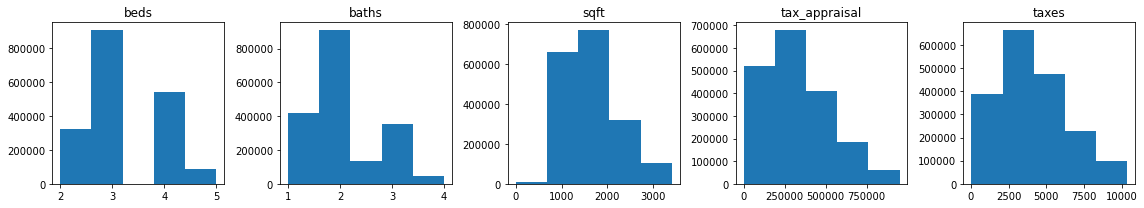

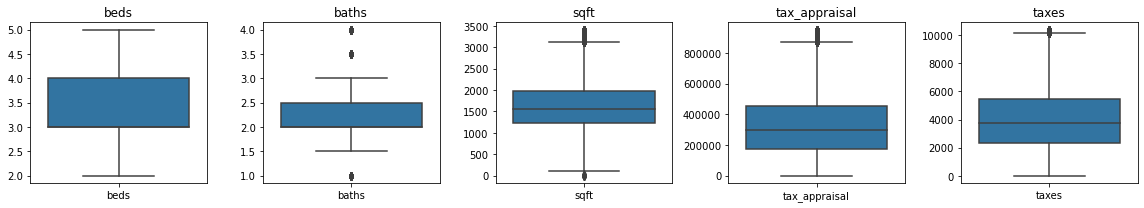

In [4]:
train, validate, test = wrangle_zillow()

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1038959 entries, 10057 to 843328
Data columns (total 7 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   beds           1038959 non-null  float64
 1   baths          1038959 non-null  float64
 2   sqft           1038959 non-null  float64
 3   tax_appraisal  1038959 non-null  float64
 4   yr_built       1038959 non-null  object 
 5   taxes          1038959 non-null  float64
 6   fips           1038959 non-null  object 
dtypes: float64(5), object(2)
memory usage: 63.4+ MB


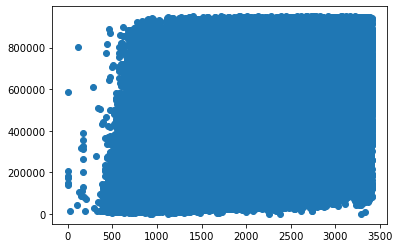

In [17]:
plt.scatter(train.sqft, train.tax_appraisal)

plt.show()

In [19]:
baseline = train.tax_appraisal.mean()
baseline

327962.9287565727

In [25]:
train['baseline_y'] = round(baseline, 0)

In [27]:
train.baseline_y = train.baseline_y.astype(int)

In [29]:
train.head()

,beds,baths,sqft,tax_appraisal,yr_built,taxes,fips,baseline_y
10057,4.0,2.0,1561.0,248240.0,1973,2504.40,6059.0,327963
2004970,3.0,2.0,1770.0,88390.0,1960,1671.93,6037.0,327963
306031,2.0,1.0,1452.0,81169.0,1946,1310.88,6037.0,327963
1038595,3.0,1.0,1000.0,119174.0,1950,1900.28,6037.0,327963
270959,3.0,2.0,1974.0,432268.0,1988,5315.27,6037.0,327963


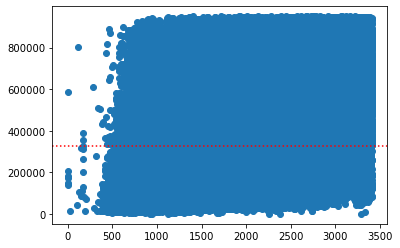

In [103]:
plt.scatter(train.sqft, train.tax_appraisal)

plt.axhline(baseline, ls=':', c= 'red')

plt.show()

<a id='2'> </a>
<div class="alert alert-block alert-info">
</div>

***
### 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of `taxvaluedollarcnt` using only `calculatedfinishedsqft`.
***
<div class="alert alert-block alert-info">
</div>

|[--__TOP__--](#TOP)||[--__1__--](#1)||[--__2__--](#2)||[--__3__--](#3)||[--__4__--](#4)||[--__5__--](#5)||[--__6__--](#6)||[--__7__--](#7)||[--__8__--](#8)||[--__9__--](#9)||[--__BONUS__--](#BONUS)||[--__Bonus_1__--](#B1)||[--__Bonus_2__--](#B2)|

In [34]:
X = train[['sqft']]
y = train.tax_appraisal

#### Here is some sample code to get you started:

In [35]:
from sklearn.linear_model import LinearRegression

# assuming X and y are already defined
model = LinearRegression().fit(X, y)
predictions = model.predict(X)

#### Modify and add to the code above as necessary for it to work with the zillow dataset.

In [37]:
train['yhat'] = predictions

In [38]:
train.head()

,beds,baths,sqft,tax_appraisal,yr_built,taxes,fips,baseline_y,yhat
10057,4.0,2.0,1561.0,248240.0,1973,2504.40,6059.0,327963,314131.125460
2004970,3.0,2.0,1770.0,88390.0,1960,1671.93,6037.0,327963,345309.674341
306031,2.0,1.0,1452.0,81169.0,1946,1310.88,6037.0,327963,297870.542550
1038595,3.0,1.0,1000.0,119174.0,1950,1900.28,6037.0,327963,230441.336357
270959,3.0,2.0,1974.0,432268.0,1988,5315.27,6037.0,327963,375742.324924


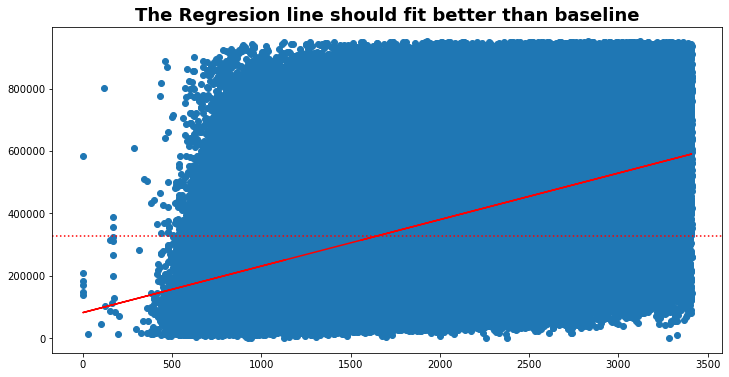

In [45]:
plt.figure(figsize=(12,6))

plt.scatter(train.sqft, train.tax_appraisal)

plt.axhline(baseline, ls=':', c= 'red')

plt.plot(train.sqft, train.yhat, c= 'red')

plt.title('The Regresion line should fit better than baseline',
          fontdict={'fontsize': 18,
                    'fontweight': 'bold',
                    'color': 'black',
#                     'verticalalignment': 'baseline',
#                     'horizontalalignment': loc
              
          }
         )

plt.show()

<a id='3'> </a>
<div class="alert alert-block alert-info">
</div>

***
### 3. Plot the residuals for the linear regression model that you made.
***
<div class="alert alert-block alert-info">
</div>

|[--__TOP__--](#TOP)||[--__1__--](#1)||[--__2__--](#2)||[--__3__--](#3)||[--__4__--](#4)||[--__5__--](#5)||[--__6__--](#6)||[--__7__--](#7)||[--__8__--](#8)||[--__9__--](#9)||[--__BONUS__--](#BONUS)||[--__Bonus_1__--](#B1)||[--__Bonus_2__--](#B2)|

In [41]:
train['baseline_residual'] = train.tax_appraisal - train.baseline_y

train['residual'] = train.tax_appraisal - train.yhat

In [42]:
train.head()

,beds,baths,sqft,tax_appraisal,yr_built,taxes,fips,baseline_y,yhat,baseline_residual,residual
10057,4.0,2.0,1561.0,248240.0,1973,2504.40,6059.0,327963,314131.125460,-79723.0,-65891.125460
2004970,3.0,2.0,1770.0,88390.0,1960,1671.93,6037.0,327963,345309.674341,-239573.0,-256919.674341
306031,2.0,1.0,1452.0,81169.0,1946,1310.88,6037.0,327963,297870.542550,-246794.0,-216701.542550
1038595,3.0,1.0,1000.0,119174.0,1950,1900.28,6037.0,327963,230441.336357,-208789.0,-111267.336357
270959,3.0,2.0,1974.0,432268.0,1988,5315.27,6037.0,327963,375742.324924,104305.0,56525.675076


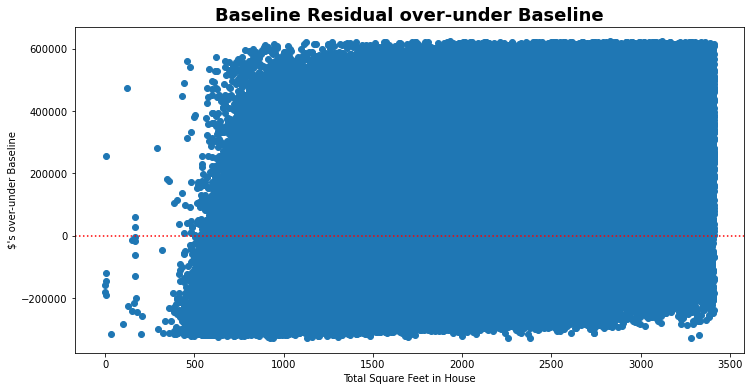

In [59]:
plt.figure(figsize=(12,6))

plt.scatter(train.sqft, train.baseline_residual)

plt.axhline(0, ls=':', c= 'red')

# plt.plot(train.baseline_y, train.yhat, c= 'red')

plt.xlabel('Total Square Feet in House')
plt.ylabel('$\'s over-under Baseline')

plt.title('Baseline Residual over-under Baseline',
          fontdict={'fontsize': 18,
                    'fontweight': 'bold',
                    'color': 'black',
#                     'verticalalignment': 'baseline',
#                     'horizontalalignment': loc
              
          }
         )

plt.show()

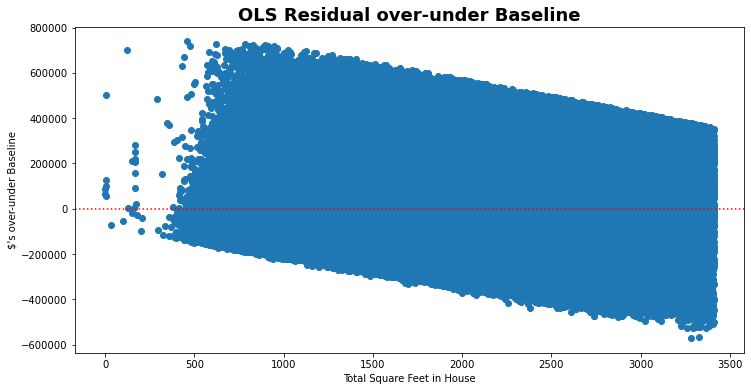

In [58]:
plt.figure(figsize=(12,6))

plt.scatter(train.sqft, train.residual)

plt.axhline(0, ls=':', c= 'red')

# plt.plot(train.baseline_y, train.yhat, c= 'red')
plt.xlabel('Total Square Feet in House')
plt.ylabel('$\'s over-under Baseline')

plt.title('OLS Residual over-under Baseline',
          fontdict={'fontsize': 18,
                    'fontweight': 'bold',
                    'color': 'black',
#                     'verticalalignment': 'baseline',
#                     'horizontalalignment': loc
              
          }
         )

plt.show()

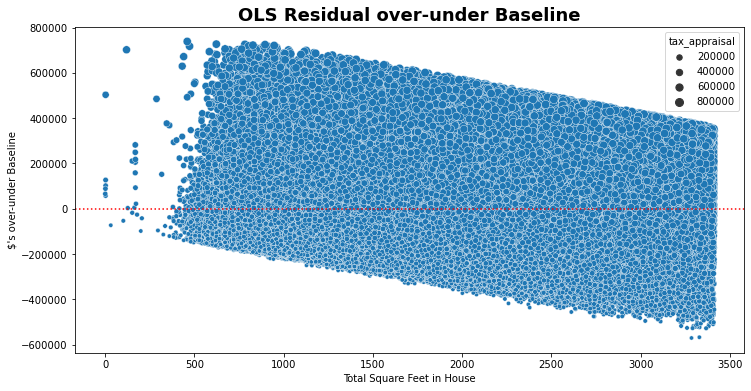

In [134]:
plt.figure(figsize=(12,6))

sns.scatterplot(data=train, x=train.sqft, y=train.residual, size=train.tax_appraisal)

plt.axhline(0, ls=':', c= 'red')

# plt.plot(train.baseline_y, train.yhat, c= 'red')
plt.xlabel('Total Square Feet in House')
plt.ylabel('$\'s over-under Baseline')

plt.title('OLS Residual over-under Baseline',
          fontdict={'fontsize': 18,
                    'fontweight': 'bold',
                    'color': 'black',
#                     'verticalalignment': 'baseline',
#                     'horizontalalignment': loc
              
          }
         )

plt.show()

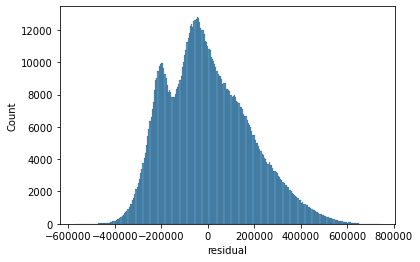

In [137]:
sns.histplot(data=train,
             x= train.residual
            )
plt.show()

In [62]:
train.residual.sum()

-6.924383342266083e-06

In [64]:
train.baseline_residual.sum()

-74019.0

In [63]:
train.residual.abs().sum()

151116181348.47592

In [65]:
train.baseline_residual.abs().sum()

168205312005.0

<a id='4'> </a>
<div class="alert alert-block alert-info">
</div>

***
### 4. Calculate the 
1. **SSE  - sum of squared errors,**
2. **ESS  - explained sum of squares,** 
3. **TSS  - total sum of squares,**
4. **MSE  - mean squared error, and** 
5. **RMSE - root mean squared error for your model.**
***
<div class="alert alert-block alert-info">
</div>

|[--__TOP__--](#TOP)||[--__1__--](#1)||[--__2__--](#2)||[--__3__--](#3)||[--__4__--](#4)||[--__5__--](#5)||[--__6__--](#6)||[--__7__--](#7)||[--__8__--](#8)||[--__9__--](#9)||[--__BONUS__--](#BONUS)||[--__Bonus_1__--](#B1)||[--__Bonus_2__--](#B2)|

In [66]:
#import sklearn mean_square_error
from sklearn.metrics import mean_squared_error

### MSE (Mean Squared Error)

In [68]:
MSE_baseline = mean_squared_error(train.tax_appraisal, train.baseline_y)
MSE = mean_squared_error(train.tax_appraisal, train.yhat)

print('MSE Baseline: ',MSE_baseline)
print('MSE: ', MSE)

MSE Baseline:  39596016702.05282
MSE:  32510725506.882072


### SSE (Sum of Squared Errors)
### SSE Baseline = TSS (Total Sum of Squares)

In [69]:
SSE_baseline = MSE_baseline * len(train)
SSE = MSE * len(train)
print('SSE Baseline:', SSE_baseline)
print('SSE:', SSE)

SSE Baseline: 4.11386379167481e+16
SSE: 3.3777310861904692e+16


In [89]:
# Also the ESS
#   TSS - SSE = ESS
TSS = SSE_baseline 
print(f'TSS - SSE = {TSS - SSE}')
print(f'Calculated closeness to sklearn is nearly {(TSS - SSE) / ESS:.0%}')

TSS - SSE = 7361327054843404.0
Calculated closeness to sklearn is nearly 100%


### ESS (Explained Sum of Squares)

In [73]:
ESS = mean_squared_error(train.yhat, train.baseline_y) * len(train)
print('ESS:', ESS)

ESS: 7361327054846795.0


### RMSE (Root of Mean Squared Error)

In [70]:
RMSE_baseline = MSE_baseline ** .5
RMSE = MSE ** .5
print('RMSE Baseline: ',RMSE_baseline)
print('RMSE: ', RMSE)

RMSE Baseline:  198987.47875696304
RMSE:  180307.30852320456


<a id='5'> </a>
<div class="alert alert-block alert-info">
</div>

***

### 5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average `taxvaluedollarcnt` amount).
***
<div class="alert alert-block alert-info">
</div>

|[--__TOP__--](#TOP)||[--__1__--](#1)||[--__2__--](#2)||[--__3__--](#3)||[--__4__--](#4)||[--__5__--](#5)||[--__6__--](#6)||[--__7__--](#7)||[--__8__--](#8)||[--__9__--](#9)||[--__BONUS__--](#BONUS)||[--__Bonus_1__--](#B1)||[--__Bonus_2__--](#B2)|

In [ ]:
# See Above 

<a id='6'> </a>
<div class="alert alert-block alert-info">
</div>

***

### 6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.
***
<div class="alert alert-block alert-info">
</div>

|[--__TOP__--](#TOP)||[--__1__--](#1)||[--__2__--](#2)||[--__3__--](#3)||[--__4__--](#4)||[--__5__--](#5)||[--__6__--](#6)||[--__7__--](#7)||[--__8__--](#8)||[--__9__--](#9)||[--__BONUS__--](#BONUS)||[--__Bonus_1__--](#B1)||[--__Bonus_2__--](#B2)|

In [93]:
SSE_baseline = MSE_baseline * len(train)
SSE = MSE * len(train)

if SSE < TSS:
    print(f'    The Regression Model for:\n\
             predicting\n\
    Tax Value using Square feet is\n\
    Better than Baseline!\n\
    Total Sum of Squared Error is: ${TSS}\n\
    Unexplained Sum of Squared Error is only: ${SSE}')
    
else:
    print(f'The Regression Model for:\n\
             predicting\n\
    Tax Value using Square feet is\n\
    Worse than Baseline!\n\
    Total Sum of Squared Error is only: ${ESS}\n\
    Unexplained Sum of Squared Error is: ${SSE}')

    The Regression Model for:
             predicting
    Tax Value using Square feet is
    Better than Baseline!
    Total Sum of Squared Error is: $4.11386379167481e+16
    Unexplained Sum of Squared Error is only: $3.3777310861904692e+16


<a id='7'> </a>
<div class="alert alert-block alert-info">
</div>

***

### 7. What is the amount of variance explained in your model?
***
<div class="alert alert-block alert-info">
</div>

|[--__TOP__--](#TOP)||[--__1__--](#1)||[--__2__--](#2)||[--__3__--](#3)||[--__4__--](#4)||[--__5__--](#5)||[--__6__--](#6)||[--__7__--](#7)||[--__8__--](#8)||[--__9__--](#9)||[--__BONUS__--](#BONUS)||[--__Bonus_1__--](#B1)||[--__Bonus_2__--](#B2)|

### $R^2$ - Explained Varience
$R^2 = \frac{ESS}{TSS}$

In [96]:
R2 = ESS/TSS
print(f'R^2 = {ESS/TSS:.0%}')

R^2 = 18%


<a id='8'> </a>
<div class="alert alert-block alert-info">
</div>

***

### 8. Is your model better than the baseline model?
***
<div class="alert alert-block alert-info">
</div>

|[--__TOP__--](#TOP)||[--__1__--](#1)||[--__2__--](#2)||[--__3__--](#3)||[--__4__--](#4)||[--__5__--](#5)||[--__6__--](#6)||[--__7__--](#7)||[--__8__--](#8)||[--__9__--](#9)||[--__BONUS__--](#BONUS)||[--__Bonus_1__--](#B1)||[--__Bonus_2__--](#B2)|

###  It seems that the model is better than Baseline...
### However, the Explained Variance is only 18%
### As such, The Unexplained Variance is still 72%

<a id='9'> </a>
<div class="alert alert-block alert-info">
</div>

***

### 9. Create a file named `evaluate.py` that contains the following functions.
***
<div class="alert alert-block alert-info">
</div>

|[--__TOP__--](#TOP)||[--__1__--](#1)||[--__2__--](#2)||[--__3__--](#3)||[--__4__--](#4)||[--__5__--](#5)||[--__6__--](#6)||[--__7__--](#7)||[--__8__--](#8)||[--__9__--](#9)||[--__BONUS__--](#BONUS)||[--__Bonus_1__--](#B1)||[--__Bonus_2__--](#B2)|

  - `plot_residuals(y, yhat)`: creates a residual plot
  - `regression_errors(y, yhat)`: returns the following values:
    - sum of squared errors (SSE)
    - explained sum of squares (ESS)
    - total sum of squares (TSS)
    - mean squared error (MSE)
    - root mean squared error (RMSE)
  - `baseline_mean_errors(y)`: computes the SSE, MSE, and RMSE for the baseline model
  - `better_than_baseline(y, yhat)`: returns true if your model performs better than the baseline, otherwise false

###  - `plot_residuals(y, yhat)`: creates a residual plot

In [101]:
def plot_residuals(y, yhat):
    plt.figure(figsize=(12,6))

    plt.scatter(train.sqft, y - yhat)

    plt.axhline(0, ls=':', c= 'red')

#     plt.plot(y, yhat, c= 'red')
    plt.xlabel('Total Square Feet in House')
    plt.ylabel('$\'s over-under Baseline')

    plt.title('OLS Residual over-under Baseline',
              fontdict={'fontsize': 18,
                        'fontweight': 'bold',
                        'color': 'black',
    #                     'verticalalignment': 'baseline',
    #                     'horizontalalignment': loc

              }
             )

    plt.show()

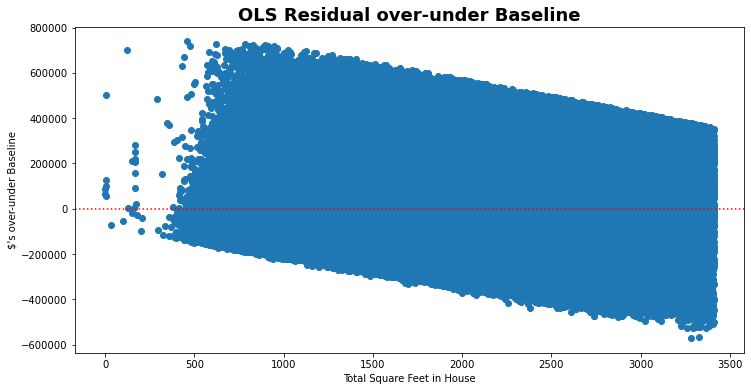

In [102]:
plot_residuals(train.tax_appraisal, train.yhat)

###  - `regression_errors(y, yhat)`: returns the following values:
   **- sum of squared errors (SSE)**<br>
   **- explained sum of squares (ESS)**<br>
   **- total sum of squares (TSS)**<br>
   **- mean squared error (MSE)**<br>
   **- root mean squared error (RMSE)**<br>

In [120]:
def regression_errors(y, yhat):
    '''
    
    '''
    
#     Get the Baseline
    baseline = y.mean()
#     Round the Baseline
    train['baseline_y'] = round(baseline, 0)
#     Make the Baseline integers
    train.baseline_y = train.baseline_y.astype(int)
#     save the Baseline
    baseline_y = train.baseline_y
    
    baseline_residual = y - baseline_y

    residual = y - yhat
    
    #import sklearn mean_square_error
    from sklearn.metrics import mean_squared_error
    
    MSE_baseline = mean_squared_error(y, baseline_y)
    SSE_baseline = MSE_baseline * len(y)
    ESS = mean_squared_error(yhat, baseline_y) * len(y)
    RMSE_baseline = MSE_baseline ** .5
    TSS = SSE_baseline 
    
    MSE = mean_squared_error(y, yhat)
    SSE = MSE * len(y)
    RMSE = MSE ** .5
    
    print(f'''REGRESSION ERRORS:
    
    Sum of Squared Errors:
    SSE = {round(SSE)}
    ----------------------
    Explained Sum of Squares:
    ESS = {round(ESS)}
    ----------------------
    Total Sum of Squares:
    TSS = {round(TSS)}
    ----------------------
    Mean Squared Error:
    MSE = {round(MSE)}
    ----------------------
    Root Mean Squared Error:
    RMSE = {round(RMSE)}
    ''')
    return SSE, ESS, TSS, MSE, RMSE

In [121]:
regression_errors(train.tax_appraisal, train.yhat)

REGRESSION ERRORS:
    
    Sum of Squared Errors:
    SSE = 33777310861904692
    ----------------------
    Explained Sum of Squares:
    ESS = 7361327054846795
    ----------------------
    Total Sum of Squares:
    TSS = 41138637916748096
    ----------------------
    Mean Squared Error:
    MSE = 32510725507
    ----------------------
    Root Mean Squared Error:
    RMSE = 180307
    


(3.3777310861904692e+16,
 7361327054846795.0,
 4.11386379167481e+16,
 32510725506.882072,
 180307.30852320456)

### MSE (Mean Squared Error)

In [68]:
MSE_baseline = mean_squared_error(train.tax_appraisal, train.baseline_y)
MSE = mean_squared_error(train.tax_appraisal, train.yhat)

print('MSE Baseline: ',MSE_baseline)
print('MSE: ', MSE)

MSE Baseline:  39596016702.05282
MSE:  32510725506.882072


### SSE (Sum of Squared Errors)
### SSE Baseline = TSS (Total Sum of Squares)

In [69]:
SSE_baseline = MSE_baseline * len(train)
SSE = MSE * len(train)
print('SSE Baseline:', SSE_baseline)
print('SSE:', SSE)

SSE Baseline: 4.11386379167481e+16
SSE: 3.3777310861904692e+16


In [89]:
# Also the ESS
#   TSS - SSE = ESS
TSS = SSE_baseline 
print(f'TSS - SSE = {TSS - SSE}')
print(f'Calculated closeness to sklearn is nearly {(TSS - SSE) / ESS:.0%}')

TSS - SSE = 7361327054843404.0
Calculated closeness to sklearn is nearly 100%


### ESS (Explained Sum of Squares)

In [73]:
ESS = mean_squared_error(train.yhat, train.baseline_y) * len(train)
print('ESS:', ESS)

ESS: 7361327054846795.0


### RMSE (Root of Mean Squared Error)

In [70]:
RMSE_baseline = MSE_baseline ** .5
RMSE = MSE ** .5
print('RMSE Baseline: ',RMSE_baseline)
print('RMSE: ', RMSE)

RMSE Baseline:  198987.47875696304
RMSE:  180307.30852320456


###  - `baseline_mean_errors(y)`: computes the SSE, MSE, and RMSE for the baseline model

In [127]:
def baseline_mean_errors(y):
    '''
    
    '''
    
#     Get the Baseline
    baseline = y.mean()
#     Round the Baseline
    train['baseline_y'] = round(baseline, 0)
#     Make the Baseline integers
    train.baseline_y = train.baseline_y.astype(int)
#     save the Baseline
    baseline_y = train.baseline_y
    
    baseline_residual = y - baseline_y

    #import sklearn mean_square_error
    from sklearn.metrics import mean_squared_error
    
    MSE_baseline = mean_squared_error(y, baseline_y)
    SSE_baseline = MSE_baseline * len(y)
    RMSE_baseline = MSE_baseline ** .5
    
    print(f'''BASELINE ERRORS:
    
    Sum of Squared Errors for Baseline:
    SSE Baseline = {round(SSE_baseline)}
    ----------------------
    Mean Squared Error for Baseline:
    MSE Baseline = {round(MSE_baseline)}
    ----------------------
    Root Mean Squared Error for Baseline:
    RMSE Baseline = {round(RMSE_baseline)}
    ''')
    return SSE_baseline, MSE_baseline, RMSE_baseline

In [128]:
baseline_mean_errors(train.tax_appraisal)

BASELINE ERRORS:
    
    Sum of Squared Errors for Baseline:
    SSE Baseline = 41138637916748096
    ----------------------
    Mean Squared Error for Baseline:
    MSE Baseline = 39596016702
    ----------------------
    Root Mean Squared Error for Baseline:
    RMSE Baseline = 198987
    


(4.11386379167481e+16, 39596016702.05282, 198987.47875696304)

  - `better_than_baseline(y, yhat)`: returns true if your model performs better than the baseline, otherwise false

In [130]:
def better_than_baseline(y, yhat):
    '''
    
    '''
    
#     Get the Baseline
    baseline = y.mean()
#     Round the Baseline
    train['baseline_y'] = round(baseline, 0)
#     Make the Baseline integers
    train.baseline_y = train.baseline_y.astype(int)
#     save the Baseline
    baseline_y = train.baseline_y
    
    baseline_residual = y - baseline_y

    residual = y - yhat
    
    #import sklearn mean_square_error
    from sklearn.metrics import mean_squared_error
    
    MSE_baseline = mean_squared_error(y, baseline_y)
    SSE_baseline = MSE_baseline * len(y)
    ESS = mean_squared_error(yhat, baseline_y) * len(y)
    RMSE_baseline = MSE_baseline ** .5
    TSS = SSE_baseline 
    
    MSE = mean_squared_error(y, yhat)
    SSE = MSE * len(y)
    RMSE = MSE ** .5
    
    R2 = ESS/TSS
    
    if SSE < TSS:
        print(f'    The Regression Model for:\n\
             predicting\n\n\
    Tax Value using Square feet is\n\
    Better than Baseline!\n\
    R^2 = {ESS/TSS:.0%}')
    
    else:
        print(f'The Regression Model for:\n\
             predicting\n\
    Tax Value using Square feet is\n\
    Worse than Baseline!\n\
    R^2 = {ESS/TSS:.0%}')

In [131]:
better_than_baseline(train.tax_appraisal, train.yhat)

    The Regression Model for:
             predicting

    Tax Value using Square feet is
    Better than Baseline!
    R^2 = 18%


<a id='BONUS'> </a>
<div class="alert alert-block alert-info">
</div>

***

### Bonus Exercises

<a id='B1'> </a>
<div class="alert alert-block alert-info">
</div>

***

### 1. Load the `tips` dataset from either `pydataset` or `seaborn`. Fit a linear regression model (ordinary least squares) and compute `yhat`, predictions of `tip` using `total_bill`.
***
<div class="alert alert-block alert-info">
</div>

|[--__TOP__--](#TOP)||[--__1__--](#1)||[--__2__--](#2)||[--__3__--](#3)||[--__4__--](#4)||[--__5__--](#5)||[--__6__--](#6)||[--__7__--](#7)||[--__8__--](#8)||[--__9__--](#9)||[--__BONUS__--](#BONUS)||[--__Bonus_1__--](#B1)||[--__Bonus_2__--](#B2)|

<a id='B2'> </a>
<div class="alert alert-block alert-info">
</div>

***

### 2. Load the `mpg` dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your `evaluate.py` to help accomplish this.
***
<div class="alert alert-block alert-info">
</div>

|[--__TOP__--](#TOP)||[--__1__--](#1)||[--__2__--](#2)||[--__3__--](#3)||[--__4__--](#4)||[--__5__--](#5)||[--__6__--](#6)||[--__7__--](#7)||[--__8__--](#8)||[--__9__--](#9)||[--__BONUS__--](#BONUS)||[--__Bonus_1__--](#B1)||[--__Bonus_2__--](#B2)|

# Final Cell
<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>